# The objective of this notebook is to read the raw data from the World Bank Datasets

In [55]:
import wbgapi as wb
import pandas as pd

## First, check all the countries available

In [63]:
df_countries = pd.DataFrame(wb.economy.info().items)
df_countries.rename(columns={'id':'country_id','value':'country'},inplace=True)
df_countries.to_csv('countries.csv',index=False)
df_countries

country_id                      country  aggregate  longitude  latitude  \
0          ABW                        Aruba      False   -70.0167  12.51670   
1          AFE  Africa Eastern and Southern       True        NaN       NaN   
2          AFG                  Afghanistan      False    69.1761  34.52280   
3          AFW   Africa Western and Central       True        NaN       NaN   
4          AGO                       Angola      False    13.2420  -8.81155   
..         ...                          ...        ...        ...       ...   
261        XKX                       Kosovo      False    20.9260  42.56500   
262        YEM                  Yemen, Rep.      False    44.2075  15.35200   
263        ZAF                 South Africa      False    28.1871 -25.74600   
264        ZMB                       Zambia      False    28.2937 -15.39820   
265        ZWE                     Zimbabwe      False    31.0672 -17.83120   

    region adminregion lendingType incomeLevel capitalCity  
0      LCN                     LNX         HIC  Oranjestad  
1                                                           
2      SAS         SAS         IDX         LIC       Kabul  
3                                                           
4      SSF         SSA         IBD         LMC      Luanda  
..     ...         ...         ...         ...         ...  
261    ECS         ECA         IDX         UMC    Pristina  
262    MEA         MNA         IDX         LIC      Sana'a  
263    SSF         SSA         IBD         UMC    Pretoria  
264    SSF         SSA         IDX         LMC      Lusaka  
265    SSF         SSA         IDB         LMC      Harare  

[266 rows x 10 columns]

In [360]:
df_countries[df_countries['country'] == 'Dominican Republic']

country_id             country  aggregate  longitude  latitude region  \
59        DOM  Dominican Republic      False   -69.8908    18.479    LCN   

   adminregion lendingType incomeLevel    capitalCity  
59         LAC         IBD         UMC  Santo Domingo

## Now, check all the topics available

In [64]:
df_topics = pd.DataFrame(wb.topic.info().items)
df_topics.rename(columns={'id':'topic_id','value':'topic'},inplace=True)
df_topics.to_csv('topics.csv',index=False)
df_topics

topic_id                            topic  \
0         1  Agriculture & Rural Development   
1         2                Aid Effectiveness   
2         3                 Economy & Growth   
3         4                        Education   
4         5                  Energy & Mining   
5         6                      Environment   
6         7                 Financial Sector   
7         8                           Health   
8         9                   Infrastructure   
9        10        Social Protection & Labor   
10       11                          Poverty   
11       12                   Private Sector   
12       13                    Public Sector   
13       14             Science & Technology   
14       15               Social Development   
15       16                Urban Development   
16       17                           Gender   
17       18      Millenium development goals   
18       19                   Climate Change   
19       20                    External Debt   
20       21                            Trade   

                                           sourceNote  
0   For the 70 percent of the world's poor who liv...  
1   Aid effectiveness is the impact that aid has i...  
2   Economic growth is central to economic develop...  
3   Education is one of the most powerful instrume...  
4   The world economy needs ever-increasing amount...  
5   Natural and man-made environmental resources –...  
6   An economy's financial markets are critical to...  
7   Improving health is central to the Millennium ...  
8   Infrastructure helps determine the success of ...  
9   The supply of labor available in an economy in...  
10  For countries with an active poverty monitorin...  
11  Private markets drive economic growth, tapping...  
12  Effective governments improve people's standar...  
13  Technological innovation, often fueled by gove...  
14  Data here cover child labor, gender issues, re...  
15  Cities can be tremendously efficient. It is ea...  
16  Gender equality is a core development objectiv...  
17                                                     
18  Climate change is expected to hit developing c...  
19  Debt statistics provide a detailed picture of ...  
20  Trade is a key means to fight poverty and achi...

From this list, we are more interested in topics 3, 4, 8 and 14.

## Check topics 3, 4, 8 and 14

In [67]:
df_series = pd.DataFrame(columns=['series_id','series','topic_id'])
for t in [3,4,8,14]:
    df_series_t = pd.DataFrame(wb.series.info(topic=t).items)
    df_series_t.rename(columns={'id':'series_id','value':'series'},inplace=True)
    df_series_t['topic_id'] = [t]*len(df_series_t)
    df_series = pd.concat([df_series,df_series_t],ignore_index=True)
df_series.to_csv('series.csv',index=False)
df_series

series_id                                             series  \
0    NY.ADJ.NNTY.KD.ZG     Adjusted net national income (annual % growth)   
1    NY.ADJ.NNTY.PC.CD  Adjusted net national income per capita (curre...   
2    NY.ADJ.SVNX.GN.ZS  Adjusted net savings, excluding particulate em...   
3       NY.ADJ.SVNG.CD  Adjusted net savings, including particulate em...   
4    NY.ADJ.DKAP.GN.ZS  Adjusted savings: consumption of fixed capital...   
..                 ...                                                ...   
675        IP.PAT.RESD                     Patent applications, residents   
676  GB.XPD.RSDV.GD.ZS    Research and development expenditure (% of GDP)   
677  SP.POP.SCIE.RD.P6            Researchers in R&D (per million people)   
678     IP.JRN.ARTC.SC          Scientific and technical journal articles   
679  SP.POP.TECH.RD.P6            Technicians in R&D (per million people)   

    topic_id  
0          3  
1          3  
2          3  
3          3  
4          3  
..       ...  
675       14  
676       14  
677       14  
678       14  
679       14  

[680 rows x 3 columns]

In [144]:
df_series[df_series['series_id'].isin(df_series[df_series['series_id'].duplicated()]['series_id'].values)]

series_id                                             series  \
72      BX.GSR.ROYL.CD  Charges for the use of intellectual property, ...   
137     BM.GSR.ROYL.CD  Charges for the use of intellectual property, ...   
297  SP.POP.0014.TO.ZS       Population ages 0-14 (% of total population)   
373  SP.POP.1564.TO.ZS      Population ages 15-64 (% of total population)   
512  SP.POP.0014.TO.ZS       Population ages 0-14 (% of total population)   
573  SP.POP.1564.TO.ZS      Population ages 15-64 (% of total population)   
670     BM.GSR.ROYL.CD  Charges for the use of intellectual property, ...   
671     BX.GSR.ROYL.CD  Charges for the use of intellectual property, ...   

    topic_id  
72         3  
137        3  
297        4  
373        4  
512        8  
573        8  
670       14  
671       14

### Check for series with less null values

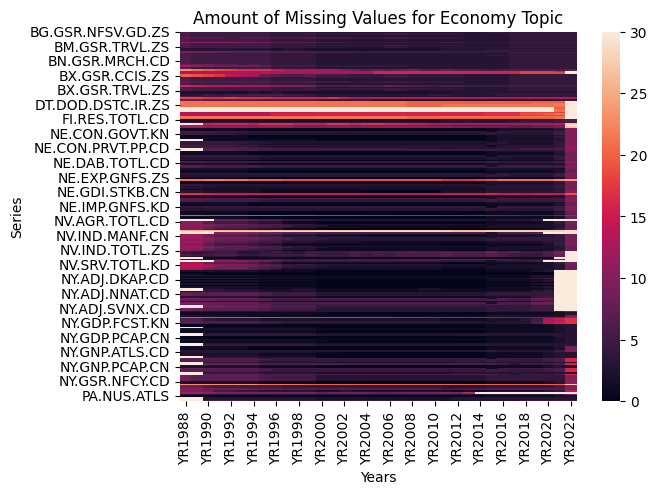

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_series_s3_sum = df_series_s3.loc['ARG'].isna().astype(int)
for c in df_countries_30['id'].values[1:]:
    df_series_s3_sum += df_series_s3.loc[c].isna().astype(int)
df_series_s3_sum

ax = plt.axes()
sns.heatmap(df_series_s3_sum, ax=ax)
plt.ylabel("Series", fontsize=10)
plt.xlabel("Years", fontsize = 10) 
plt.title("Amount of Missing Values for Economy Topic", fontsize = 12)

plt.show()

In [62]:
df_series_s3_sum['total'] = df_series_s3_sum.sum(axis=1).values

df_series_s3_sum_top10 = df_series_s3_sum.sort_values('total').head(12)
df_series_s3_sum_top10_index = list(df_series_s3_sum_top10.index)
df_series_s3_sum_top10_values = []

for i in df_series_s3_sum_top10_index:
    df_series_s3_sum_top10_values.append(df_s3[df_s3['id']==i]['value'].values[0])

df_series_s3_sum_top10['series_description'] = df_series_s3_sum_top10_values
df_series_s3_sum_top10

YR1988  YR1989  YR1990  YR1991  YR1992  YR1993  YR1994  \
series                                                                   
PA.NUS.ATLS          0       0       0       0       0       0       0   
NY.GDP.MKTP.CN       0       0       0       0       0       0       0   
NY.GDP.PCAP.CN       0       0       0       0       0       0       0   
NY.GDP.MKTP.CD       0       0       0       0       0       0       0   
NY.GDP.PCAP.CD       0       0       0       0       0       0       0   
NE.IMP.GNFS.CN       1       1       1       1       1       1       0   
NE.EXP.GNFS.CN       1       1       1       1       1       1       0   
NE.EXP.GNFS.ZS       1       1       1       1       1       1       0   
NE.IMP.GNFS.ZS       1       1       1       1       1       1       0   
NE.RSB.GNFS.ZS       1       1       1       1       1       1       0   
NE.TRD.GNFS.ZS       1       1       1       1       1       1       0   
NE.RSB.GNFS.CN       1       1       1       1       1       1       0   

                YR1995  YR1996  YR1997  ...  YR2015  YR2016  YR2017  YR2018  \
series                                  ...                                   
PA.NUS.ATLS          0       0       0  ...       1       1       1       1   
NY.GDP.MKTP.CN       0       0       0  ...       1       1       1       1   
NY.GDP.PCAP.CN       0       0       0  ...       1       1       1       1   
NY.GDP.MKTP.CD       0       0       0  ...       1       1       1       1   
NY.GDP.PCAP.CD       0       0       0  ...       1       1       1       1   
NE.IMP.GNFS.CN       0       0       0  ...       1       1       1       1   
NE.EXP.GNFS.CN       0       0       0  ...       1       1       1       1   
NE.EXP.GNFS.ZS       0       0       0  ...       1       1       1       1   
NE.IMP.GNFS.ZS       0       0       0  ...       1       1       1       1   
NE.RSB.GNFS.ZS       0       0       0  ...       1       1       1       1   
NE.TRD.GNFS.ZS       0       0       0  ...       1       1       1       1   
NE.RSB.GNFS.CN       0       0       0  ...       1       1       1       1   

                YR2019  YR2020  YR2021  YR2022  total  \
series                                                  
PA.NUS.ATLS          1       1       2       2     10   
NY.GDP.MKTP.CN       1       1       2       3     11   
NY.GDP.PCAP.CN       1       1       2       3     11   
NY.GDP.MKTP.CD       1       1       3       3     12   
NY.GDP.PCAP.CD       1       1       3       3     12   
NE.IMP.GNFS.CN       1       1       2       8     22   
NE.EXP.GNFS.CN       1       1       2       8     22   
NE.EXP.GNFS.ZS       1       1       2       8     22   
NE.IMP.GNFS.ZS       1       1       2       8     22   
NE.RSB.GNFS.ZS       1       1       2       8     22   
NE.TRD.GNFS.ZS       1       1       2       8     22   
NE.RSB.GNFS.CN       1       1       2       8     22   

                                               series_description  
series                                                             
PA.NUS.ATLS       DEC alternative conversion factor (LCU per US$)  
NY.GDP.MKTP.CN                                  GDP (current LCU)  
NY.GDP.PCAP.CN                       GDP per capita (current LCU)  
NY.GDP.MKTP.CD                                  GDP (current US$)  
NY.GDP.PCAP.CD                       GDP per capita (current US$)  
NE.IMP.GNFS.CN        Imports of goods and services (current LCU)  
NE.EXP.GNFS.CN        Exports of goods and services (current LCU)  
NE.EXP.GNFS.ZS           Exports of goods and services (% of GDP)  
NE.IMP.GNFS.ZS           Imports of goods and services (% of GDP)  
NE.RSB.GNFS.ZS  External balance on goods and services (% of GDP)  
NE.TRD.GNFS.ZS                                   Trade (% of GDP)  
NE.RSB.GNFS.CN  External balance on goods and services (curren...  

[12 rows x 37 columns]

In [121]:
df_series_s3_sum_top10['series_description'].values

array(['DEC alternative conversion factor (LCU per US$)',
       'GDP (current LCU)', 'GDP per capita (current LCU)',
       'GDP (current US$)', 'GDP per capita (current US$)',
       'Imports of goods and services (current LCU)',
       'Exports of goods and services (current LCU)',
       'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'External balance on goods and services (% of GDP)',
       'Trade (% of GDP)',
       'External balance on goods and services (current LCU)'],
      dtype=object)

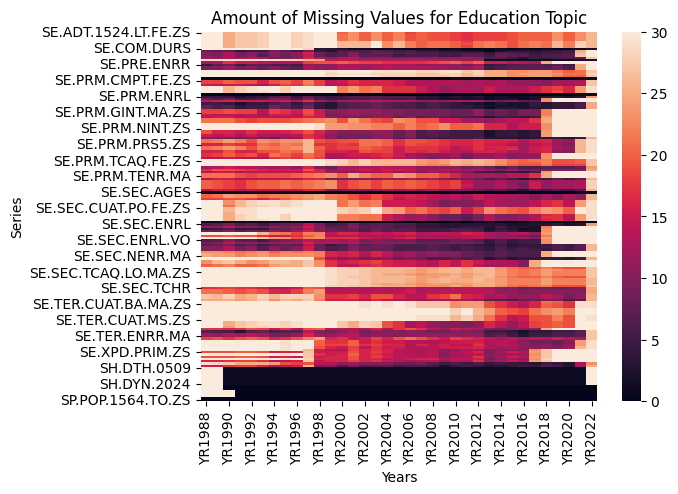

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_series_s4_sum = df_series_s4.loc['ARG'].isna().astype(int)
for c in df_countries_30['id'].values[1:]:
    df_series_s4_sum += df_series_s4.loc[c].isna().astype(int)
df_series_s4_sum

ax = plt.axes()
sns.heatmap(df_series_s4_sum, ax=ax)
plt.ylabel("Series", fontsize=10)
plt.xlabel("Years", fontsize = 10) 
plt.title("Amount of Missing Values for Education Topic", fontsize = 12)

plt.show()

In [71]:
df_series_s4_sum['total'] = df_series_s4_sum.sum(axis=1).values

df_series_s4_sum_top10 = df_series_s4_sum.sort_values('total').head(11)
df_series_s4_sum_top10_index = list(df_series_s4_sum_top10.index)
df_series_s4_sum_top10_values = []

for i in df_series_s4_sum_top10_index:
    df_series_s4_sum_top10_values.append(df_s4[df_s4['id']==i]['value'].values[0])

df_series_s4_sum_top10['series_description'] = df_series_s4_sum_top10_values
df_series_s4_sum_top10

YR1988  YR1989  YR1990  YR1991  YR1992  YR1993  YR1994  \
series                                                                      
SP.POP.1564.TO.ZS       0       0       0       0       0       0       0   
SP.POP.0014.TO.ZS       0       0       0       0       0       0       0   
SE.PRM.DURS             0       0       0       0       0       0       0   
SE.PRM.AGES             0       0       0       0       0       0       0   
SE.SEC.AGES             1       1       1       1       1       1       1   
SE.SEC.DURS             1       1       1       1       1       1       1   
SL.TLF.TOTL.FE.ZS      30      30       0       0       0       0       0   
SL.TLF.TOTL.IN         30      30       0       0       0       0       0   
SL.UEM.TOTL.ZS         30      30      30       0       0       0       0   
SL.UEM.TOTL.MA.ZS      30      30      30       0       0       0       0   
SL.UEM.TOTL.FE.ZS      30      30      30       0       0       0       0   

                   YR1995  YR1996  YR1997  ...  YR2015  YR2016  YR2017  \
series                                     ...                           
SP.POP.1564.TO.ZS       0       0       0  ...       0       0       0   
SP.POP.0014.TO.ZS       0       0       0  ...       0       0       0   
SE.PRM.DURS             0       0       0  ...       0       0       0   
SE.PRM.AGES             0       0       0  ...       0       0       0   
SE.SEC.AGES             1       1       0  ...       0       1       0   
SE.SEC.DURS             1       1       0  ...       0       1       1   
SL.TLF.TOTL.FE.ZS       0       0       0  ...       0       0       0   
SL.TLF.TOTL.IN          0       0       0  ...       0       0       0   
SL.UEM.TOTL.ZS          0       0       0  ...       0       0       0   
SL.UEM.TOTL.MA.ZS       0       0       0  ...       0       0       0   
SL.UEM.TOTL.FE.ZS       0       0       0  ...       0       0       0   

                   YR2018  YR2019  YR2020  YR2021  YR2022  total  \
series                                                             
SP.POP.1564.TO.ZS       0       0       0       0       0      0   
SP.POP.0014.TO.ZS       0       0       0       0       0      0   
SE.PRM.DURS             0       0       0       1       1      2   
SE.PRM.AGES             0       0       0       1       1      5   
SE.SEC.AGES             0       0       0       1       1     13   
SE.SEC.DURS             1       0       0       1       0     16   
SL.TLF.TOTL.FE.ZS       0       0       0       0       0     60   
SL.TLF.TOTL.IN          0       0       0       0       0     60   
SL.UEM.TOTL.ZS          0       0       0       0       0     90   
SL.UEM.TOTL.MA.ZS       0       0       0       0       0     90   
SL.UEM.TOTL.FE.ZS       0       0       0       0       0     90   

                                                  series_description  
series                                                                
SP.POP.1564.TO.ZS      Population ages 15-64 (% of total population)  
SP.POP.0014.TO.ZS       Population ages 0-14 (% of total population)  
SE.PRM.DURS                      Primary education, duration (years)  
SE.PRM.AGES                      Primary school starting age (years)  
SE.SEC.AGES              Lower secondary school starting age (years)  
SE.SEC.DURS                    Secondary education, duration (years)  
SL.TLF.TOTL.FE.ZS       Labor force, female (% of total labor force)  
SL.TLF.TOTL.IN                                    Labor force, total  
SL.UEM.TOTL.ZS     Unemployment, total (% of total labor force) (...  
SL.UEM.TOTL.MA.ZS  Unemployment, male (% of male labor force) (mo...  
SL.UEM.TOTL.FE.ZS  Unemployment, female (% of female labor force)...  

[11 rows x 37 columns]

In [120]:
df_series_s4_sum_top10['series_description'].values

array(['Population ages 15-64 (% of total population)',
       'Population ages 0-14 (% of total population)',
       'Primary education, duration (years)',
       'Primary school starting age (years)',
       'Lower secondary school starting age (years)',
       'Secondary education, duration (years)',
       'Labor force, female (% of total labor force)',
       'Labor force, total',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Unemployment, female (% of female labor force) (modeled ILO estimate)'],
      dtype=object)

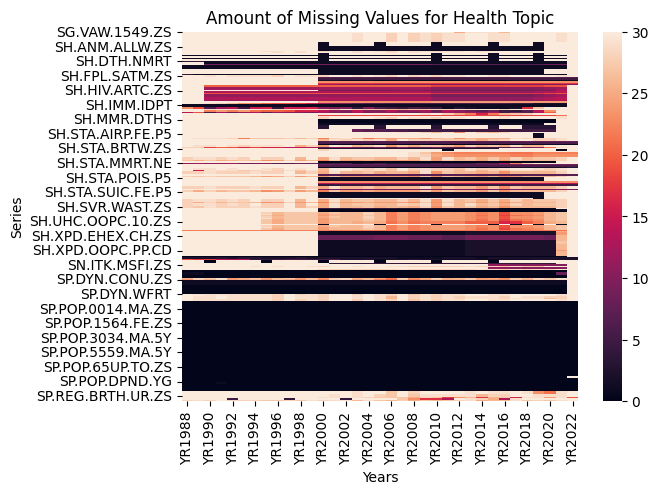

In [105]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_series_s8_sum = df_series_s8.loc['ARG'].isna().astype(int)
for c in df_countries_30['id'].values[1:]:
    df_series_s8_sum += df_series_s8.loc[c].isna().astype(int)
df_series_s8_sum

ax = plt.axes()
sns.heatmap(df_series_s8_sum, ax=ax)
plt.ylabel("Series", fontsize=10)
plt.xlabel("Years", fontsize = 10) 
plt.title("Amount of Missing Values for Health Topic", fontsize = 12)

plt.show()

In [106]:
df_series_s8_sum['total'] = df_series_s8_sum.sum(axis=1).values

df_series_s8_sum_top10 = df_series_s8_sum.sort_values('total').head(60)
df_series_s8_sum_top10_index = list(df_series_s8_sum_top10.index)
df_series_s8_sum_top10_values = []

for i in df_series_s8_sum_top10_index:
    df_series_s8_sum_top10_values.append(df_s8[df_s8['id']==i]['value'].values[0])

df_series_s8_sum_top10['series_description'] = df_series_s8_sum_top10_values
df_series_s8_sum_top10

YR1988  YR1989  YR1990  YR1991  YR1992  YR1993  YR1994  \
series                                                                      
SP.POP.5054.FE.5Y       0       0       0       0       0       0       0   
SP.POP.1014.FE.5Y       0       0       0       0       0       0       0   
SP.POP.7074.FE.5Y       0       0       0       0       0       0       0   
SP.POP.7074.MA.5Y       0       0       0       0       0       0       0   
SP.POP.7579.FE.5Y       0       0       0       0       0       0       0   
SP.POP.7579.MA.5Y       0       0       0       0       0       0       0   
SP.POP.1014.MA.5Y       0       0       0       0       0       0       0   
SP.POP.1519.FE.5Y       0       0       0       0       0       0       0   
SP.POP.65UP.TO.ZS       0       0       0       0       0       0       0   
SP.POP.1519.MA.5Y       0       0       0       0       0       0       0   
SP.POP.1564.FE.ZS       0       0       0       0       0       0       0   
SP.POP.80UP.FE.5Y       0       0       0       0       0       0       0   
SP.POP.80UP.MA.5Y       0       0       0       0       0       0       0   
SP.POP.1564.MA.IN       0       0       0       0       0       0       0   
SP.POP.DPND             0       0       0       0       0       0       0   
SP.POP.5559.MA.5Y       0       0       0       0       0       0       0   
SP.POP.1564.MA.ZS       0       0       0       0       0       0       0   
SP.POP.1564.FE.IN       0       0       0       0       0       0       0   
SP.POP.1564.TO          0       0       0       0       0       0       0   
SP.POP.0509.MA.5Y       0       0       0       0       0       0       0   
SP.POP.65UP.TO          0       0       0       0       0       0       0   
SP.POP.5559.FE.5Y       0       0       0       0       0       0       0   
SP.POP.6064.MA.5Y       0       0       0       0       0       0       0   
SP.POP.4549.MA.5Y       0       0       0       0       0       0       0   
SP.POP.5054.MA.5Y       0       0       0       0       0       0       0   
SP.POP.65UP.FE.IN       0       0       0       0       0       0       0   
SP.POP.0004.FE.5Y       0       0       0       0       0       0       0   
SP.POP.0004.MA.5Y       0       0       0       0       0       0       0   
SP.POP.0509.FE.5Y       0       0       0       0       0       0       0   
SP.POP.65UP.FE.ZS       0       0       0       0       0       0       0   
SP.POP.0014.FE.IN       0       0       0       0       0       0       0   
SP.POP.0014.FE.ZS       0       0       0       0       0       0       0   
SP.POP.0014.MA.IN       0       0       0       0       0       0       0   
SP.POP.0014.MA.ZS       0       0       0       0       0       0       0   
SP.POP.0014.TO          0       0       0       0       0       0       0   
SP.POP.0014.TO.ZS       0       0       0       0       0       0       0   
SP.POP.65UP.MA.ZS       0       0       0       0       0       0       0   
SP.POP.65UP.MA.IN       0       0       0       0       0       0       0   
SP.POP.1564.TO.ZS       0       0       0       0       0       0       0   
SP.POP.6064.FE.5Y       0       0       0       0       0       0       0   
SP.POP.DPND.OL          0       0       0       0       0       0       0   
SP.POP.4044.FE.5Y       0       0       0       0       0       0       0   
SP.POP.4044.MA.5Y       0       0       0       0       0       0       0   
SP.POP.TOTL             0       0       0       0       0       0       0   
SP.POP.6569.FE.5Y       0       0       0       0       0       0       0   
SP.POP.TOTL.FE.IN       0       0       0       0       0       0       0   
SP.POP.3539.MA.5Y       0       0       0       0       0       0       0   
SP.POP.TOTL.FE.ZS       0       0       0       0       0       0       0   
SP.POP.3034.FE.5Y       0       0       0       0       0       0       0   
SP.POP.2529.MA.5Y       0       0       0       0       0       0       0   
SP.POP.2529.FE.

In [119]:
df_series_s8_sum_top10['series_description'].values

array(['Population ages 50-54, female (% of female population)',
       'Population ages 10-14, female (% of female population)',
       'Population ages 70-74, female (% of female population)',
       'Population ages 70-74, male (% of male population)',
       'Population ages 75-79, female (% of female population)',
       'Population ages 75-79, male (% of male population)',
       'Population ages 10-14, male (% of male population)',
       'Population ages 15-19, female (% of female population)',
       'Population ages 65 and above (% of total population)',
       'Population ages 15-19, male (% of male population)',
       'Population ages 15-64, female (% of female population)',
       'Population ages 80 and above, female (% of female population)',
       'Population ages 80 and above, male (% of male population)',
       'Population ages 15-64, male',
       'Age dependency ratio (% of working-age population)',
       'Population ages 55-59, male (% of male population)',
   

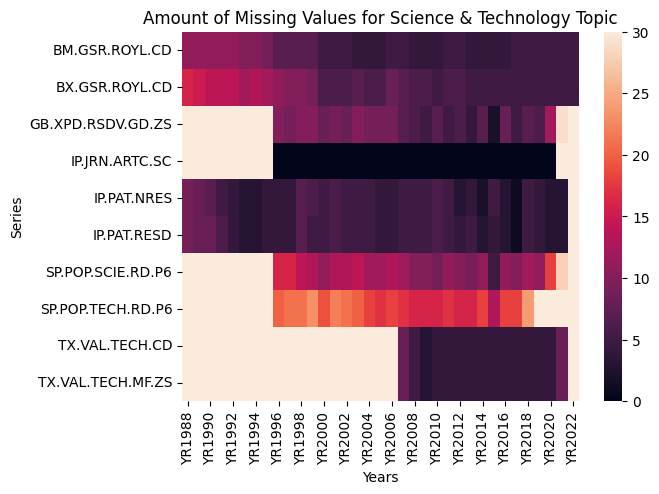

In [113]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_series_s14_sum = df_series_s14.loc['ARG'].isna().astype(int)
for c in df_countries_30['id'].values[1:]:
    df_series_s14_sum += df_series_s14.loc[c].isna().astype(int)
df_series_s14_sum

ax = plt.axes()
sns.heatmap(df_series_s14_sum, ax=ax)
plt.ylabel("Series", fontsize=10)
plt.xlabel("Years", fontsize = 10) 
plt.title("Amount of Missing Values for Science & Technology Topic", fontsize = 12)

plt.show()

In [114]:
df_series_s14_sum['total'] = df_series_s14_sum.sum(axis=1).values

df_series_s14_sum_top10 = df_series_s14_sum.sort_values('total').head(10)
df_series_s14_sum_top10_index = list(df_series_s14_sum_top10.index)
df_series_s14_sum_top10_values = []

for i in df_series_s14_sum_top10_index:
    df_series_s14_sum_top10_values.append(df_s14[df_s14['id']==i]['value'].values[0])

df_series_s14_sum_top10['series_description'] = df_series_s14_sum_top10_values
df_series_s14_sum_top10

YR1988  YR1989  YR1990  YR1991  YR1992  YR1993  YR1994  \
series                                                                      
IP.PAT.NRES             9       8       7       5       4       3       3   
IP.PAT.RESD             9       8       8       6       4       3       3   
BM.GSR.ROYL.CD         11      11      11      11      11      10      10   
BX.GSR.ROYL.CD         16      15      14      14      14      12      13   
IP.JRN.ARTC.SC         30      30      30      30      30      30      30   
GB.XPD.RSDV.GD.ZS      30      30      30      30      30      30      30   
SP.POP.SCIE.RD.P6      30      30      30      30      30      30      30   
TX.VAL.TECH.CD         30      30      30      30      30      30      30   
TX.VAL.TECH.MF.ZS      30      30      30      30      30      30      30   
SP.POP.TECH.RD.P6      30      30      30      30      30      30      30   

                   YR1995  YR1996  YR1997  ...  YR2015  YR2016  YR2017  \
series                                     ...                           
IP.PAT.NRES             4       4       4  ...       5       3       1   
IP.PAT.RESD             4       4       4  ...       4       3       1   
BM.GSR.ROYL.CD          9       7       7  ...       4       4       5   
BX.GSR.ROYL.CD         12      11      10  ...       5       5       5   
IP.JRN.ARTC.SC         30       0       0  ...       0       0       0   
GB.XPD.RSDV.GD.ZS      30      10       9  ...       2       8       5   
SP.POP.SCIE.RD.P6      30      16      16  ...       5      11      10   
TX.VAL.TECH.CD         30      30      30  ...       4       4       4   
TX.VAL.TECH.MF.ZS      30      30      30  ...       4       4       4   
SP.POP.TECH.RD.P6      30      20      21  ...      13      18      18   

                   YR2018  YR2019  YR2020  YR2021  YR2022  total  \
series                                                             
IP.PAT.NRES             5       4       3       3      30    187   
IP.PAT.RESD             5       4       3       3      30    190   
BM.GSR.ROYL.CD          5       5       5       5       5    217   
BX.GSR.ROYL.CD          5       5       5       5       5    281   
IP.JRN.ARTC.SC          0       0       0      30      30    300   
GB.XPD.RSDV.GD.ZS       7       6      12      29      30    487   
SP.POP.SCIE.RD.P6      12      11      18      28      30    594   
TX.VAL.TECH.CD          4       4       4       8      30    668   
TX.VAL.TECH.MF.ZS       4       4       4       8      30    668   
SP.POP.TECH.RD.P6      24      30      30      30      30    785   

                                                  series_description  
series                                                                
IP.PAT.NRES                        Patent applications, nonresidents  
IP.PAT.RESD                           Patent applications, residents  
BM.GSR.ROYL.CD     Charges for the use of intellectual property, ...  
BX.GSR.ROYL.CD     Charges for the use of intellectual property, ...  
IP.JRN.ARTC.SC             Scientific and technical journal articles  
GB.XPD.RSDV.GD.ZS    Research and development expenditure (% of GDP)  
SP.POP.SCIE.RD.P6            Researchers in R&D (per million people)  
TX.VAL.TECH.CD                 High-technology exports (current US$)  
TX.VAL.TECH.MF.ZS  High-technology exports (% of manufactured exp...  
SP.POP.TECH.RD.P6            Technicians in R&D (per million people)  

[10 rows x 37 columns]

In [116]:
df_series_s14_sum_top10['series_description'].values

array(['Patent applications, nonresidents',
       'Patent applications, residents',
       'Charges for the use of intellectual property, payments (BoP, current US$)',
       'Charges for the use of intellectual property, receipts (BoP, current US$)',
       'Scientific and technical journal articles',
       'Research and development expenditure (% of GDP)',
       'Researchers in R&D (per million people)',
       'High-technology exports (current US$)',
       'High-technology exports (% of manufactured exports)',
       'Technicians in R&D (per million people)'], dtype=object)

## Indicators Data


In [361]:
indicators = ["GC.XPN.TOTL.GD.ZS", "NE.RSB.GNFS.CD", "NY.GDP.MKTP.KD.ZG", "NY.GDP.PCAP.CD",
                "NY.GNP.PCAP.CD", "SE.XPD.TOTL.GD.ZS", "SE.XPD.PRIM.PC.ZS", "SE.ADT.LITR.ZS",
                "SH.XPD.GHED.GD.ZS", "SP.DYN.LE00.IN", "SH.DYN.NMRT", "SH.DYN.MORT",
                "SN.ITK.DEFC.ZS", "IP.PAT.RESD", "GB.XPD.RSDV.GD.ZS", "SP.POP.SCIE.RD.P6",
                "SI.POV.GINI", "VC.IHR.PSRC.P5", "SI.POV.NAHC", "SL.UEM.TOTL.ZS"]

countriesSelected30 = ['USA','CHN','JPN','AUS','DEU','CHE','ESP','CAN','FRA','NOR',
                        'KOR','NZL','FIN','GBR','SGP','IND','ARG','BRA','URY','CHL',
                        'BOL','PER','CUB','VEN','MEX','COL','DOM','SLV','QAT','SYR']

recentYears = 100

### Create tsv file to download data from WB API to Cloud Storage

In [3]:
import pandas as pd
indicatorsDownload = []
for i in indicators:
    url = 'http://api.worldbank.org/v2/country/all/indicator/' + i + '?format=jsonstat'
    indicatorsDownload.append(url)

df_indicatorsDownload = pd.DataFrame({'TsvHttpData-1.0':indicatorsDownload})
df_indicatorsDownload.to_csv('indicatorsDownload.tsv', sep="\t",index=False)

### Create fact table

In [362]:
from pyjstat import pyjstat

df_indicatorsDownload = pd.read_csv('https://raw.githubusercontent.com/juanesfco/PF_DS_PT03_G2_EsperanzaVida/main/Data/indicatorsDownload.tsv')
indicatorsDownload = df_indicatorsDownload.iloc[:,0].values

#df_countries = READFROM STORAGE
df_countries = pd.read_csv('countries.csv')
df_countries_selected_names = df_countries[df_countries['country_id'].isin(countriesSelected30)]['country'].values
df_countries_selected_ids = df_countries[df_countries['country_id'].isin(countriesSelected30)]['country_id'].values

df_facts = pd.DataFrame(columns=['Country','Series','Year','value'])

for url in indicatorsDownload:

    indicator = url[50:url.find('?f')]
    dir = 'api.worldbank.org/v2/country/all/indicator/' + indicator

    #storage_client = storage.Client()
    #bucket = storage_client.get_bucket('worldbank-datalake')
    #blob = bucket.blob(dir)
    #contents = blob.download_as_string()
    #dataset_from_json_string = pyjstat.Dataset.read(contents.decode("utf-8"))
    #dataframe = dataset_from_json_string.write('dataframe')

    dataset = pyjstat.Dataset.read(url)
    df = dataset.write('dataframe')
    df['Series'] = [indicator]*len(df)

    df_c = df[df['Country'].isin(df_countries_selected_names)]
    df_cm = df_c.copy()
    df_cm['Country'] = df_c['Country'].replace(df_countries_selected_names,df_countries_selected_ids)

    df_cmy = df_cm[(2022-df_cm['Year'].astype(int))<recentYears]

    df_facts = pd.concat([df_facts,df_cmy],ignore_index=True)

    #print(df_cmy)

#dataframe
df_facts.rename(columns={'Country':'country_id','Series':'series_id','Year':'year'},inplace=True)
df_facts

country_id          series_id  year  value
0            ARG  GC.XPN.TOTL.GD.ZS  1960    NaN
1            ARG  GC.XPN.TOTL.GD.ZS  1961    NaN
2            ARG  GC.XPN.TOTL.GD.ZS  1962    NaN
3            ARG  GC.XPN.TOTL.GD.ZS  1963    NaN
4            ARG  GC.XPN.TOTL.GD.ZS  1964    NaN
...          ...                ...   ...    ...
37795        VEN     SL.UEM.TOTL.ZS  2018  5.020
37796        VEN     SL.UEM.TOTL.ZS  2019  5.092
37797        VEN     SL.UEM.TOTL.ZS  2020  7.530
37798        VEN     SL.UEM.TOTL.ZS  2021  6.471
37799        VEN     SL.UEM.TOTL.ZS  2022  5.328

[37800 rows x 4 columns]

In [363]:
df_facts['value'].isna().sum()

17190

In [334]:
df_facts.to_csv('facts.csv',index=False)

In [364]:
df_facts_30 = df_facts[df_facts['year'].astype(int)>=1993]
df_facts_null = df_facts_30[df_facts_30['value'].isna()]
series = df_facts_null['series_id'].unique()
countries = df_facts_null['country_id'].unique()
naSummary = pd.DataFrame(columns=['country_id','series','#NaN'])
for c in countries:
    df_facts_null_c = df_facts_null[df_facts_null['country_id']==c]
    for s in series:
        df_facts_null_cs = df_facts_null_c[df_facts_null_c['series_id']==s]
        l = sum(df_facts_null_cs['value'].isna())
        if l > 0:
            naSummary = pd.concat([naSummary,pd.DataFrame([[c,s,l]],columns=['country_id','series','#NaN'])],ignore_index=True)

naSummary

country_id             series #NaN
0          ARG  GC.XPN.TOTL.GD.ZS   10
1          ARG  SE.XPD.TOTL.GD.ZS    5
2          ARG  SE.XPD.PRIM.PC.ZS   10
3          ARG     SE.ADT.LITR.ZS   29
4          ARG  SH.XPD.GHED.GD.ZS    9
..         ...                ...  ...
463        CAN  GB.XPD.RSDV.GD.ZS    5
464        CAN  SP.POP.SCIE.RD.P6    7
465        CAN        SI.POV.GINI    3
466        CAN     VC.IHR.PSRC.P5    1
467        CAN        SI.POV.NAHC   30

[468 rows x 3 columns]

In [365]:
naSummary['#NaN'].sum()

4789

In [366]:
naSummary.groupby('series').sum().sort_values('#NaN')

country_id #NaN
series                                                                   
NY.GDP.PCAP.CD                                             CUBSYRVEN   12
NE.RSB.GNFS.CD                              BOLCUBJPNNZLQATSYRVENUSA   18
NY.GDP.MKTP.KD.ZG                                       CUBQATSYRVEN   19
SP.DYN.LE00.IN     ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...   30
SH.DYN.NMRT        ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...   30
SH.DYN.MORT        ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...   30
NY.GNP.PCAP.CD                                       CUBQATCHESYRVEN   31
IP.PAT.RESD        ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...  133
VC.IHR.PSRC.P5     ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...  141
SE.XPD.TOTL.GD.ZS  ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...  226
GC.XPN.TOTL.GD.ZS  ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...  274
SH.XPD.GHED.GD.ZS  ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...  275
GB.XPD.RSDV.GD.ZS  ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...  340
SN.ITK.DEFC.ZS     ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...  360
SI.POV.GINI        ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...  411
SP.POP.SCIE.RD.P6  ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...  446
SE.XPD.PRIM.PC.ZS  ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...  554
SE.ADT.LITR.ZS     ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...  726
SI.POV.NAHC        ARGAUSBOLBRACHLCHNCOLCUBDOMSLVFINFRADEUINDJPNK...  733

In [367]:
naSummaryLess10 = naSummary[naSummary['#NaN']<30]
naSummaryLess10

country_id             series #NaN
0          ARG  GC.XPN.TOTL.GD.ZS   10
1          ARG  SE.XPD.TOTL.GD.ZS    5
2          ARG  SE.XPD.PRIM.PC.ZS   10
3          ARG     SE.ADT.LITR.ZS   29
4          ARG  SH.XPD.GHED.GD.ZS    9
..         ...                ...  ...
462        CAN        IP.PAT.RESD    1
463        CAN  GB.XPD.RSDV.GD.ZS    5
464        CAN  SP.POP.SCIE.RD.P6    7
465        CAN        SI.POV.GINI    3
466        CAN     VC.IHR.PSRC.P5    1

[430 rows x 3 columns]

In [368]:
naSummaryLess10['#NaN'].sum()

3649

In [369]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
for i in range(len(naSummaryLess10)):
    c = naSummaryLess10.iloc[i,0]
    s = naSummaryLess10.iloc[i,1]
    df_facts_cs = df_facts[(df_facts['country_id']==c)&(df_facts['series_id']==s)]

    #print(df_facts_cs)
    
    y = df_facts_cs['value'].values
    ARIMAmodel = ARIMA(y, order = (1, 0, 1))
    ARIMAmodel = ARIMAmodel.fit()

    indexNaN = df_facts_cs[df_facts_cs['value'].isna()].index
    for j in indexNaN:
        year = int(df_facts_cs.loc[j,'year'])
        if year >= 1993:
            x = year - 1960
            y_pred = ARIMAmodel.predict(x)
            #print('Imputation on country: ',c,', series: ',s,', year: ',str(year),' and value: ',y_pred[0])

            df_facts_cs.loc[j,'value'] = y_pred[0]

    df_facts[(df_facts['country_id']==c)&(df_facts['series_id']==s)] = df_facts_cs

    

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed 

In [370]:
df_facts['value'].isna().sum()

13541

In [371]:
df_facts_30 = df_facts[df_facts['year'].astype(int)>=1993]
df_facts_null = df_facts_30[df_facts_30['value'].isna()]
series = df_facts_null['series_id'].unique()
countries = df_facts_null['country_id'].unique()
naSummary = pd.DataFrame(columns=['country_id','series','#NaN'])
for c in countries:
    df_facts_null_c = df_facts_null[df_facts_null['country_id']==c]
    for s in series:
        df_facts_null_cs = df_facts_null_c[df_facts_null_c['series_id']==s]
        l = sum(df_facts_null_cs['value'].isna())
        if l > 0:
            naSummary = pd.concat([naSummary,pd.DataFrame([[c,s,l]],columns=['country_id','series','#NaN'])],ignore_index=True)

for i in indicators:
    if i not in naSummary['series'].values:
        naSummary = pd.concat([naSummary,pd.DataFrame([['',i,0]],columns=['country_id','series','#NaN'])],ignore_index=True)

naSummary

country_id             series #NaN
0         CHN  GC.XPN.TOTL.GD.ZS   30
1         CUB  GC.XPN.TOTL.GD.ZS   30
2         CUB  SP.POP.SCIE.RD.P6   30
3         CUB        SI.POV.GINI   30
4         CUB        SI.POV.NAHC   30
5         QAT  GC.XPN.TOTL.GD.ZS   30
6         QAT     SN.ITK.DEFC.ZS   30
7         QAT        SI.POV.GINI   30
8         QAT        SI.POV.NAHC   30
9         SYR  GC.XPN.TOTL.GD.ZS   30
10        SYR     SN.ITK.DEFC.ZS   30
11        VEN  GC.XPN.TOTL.GD.ZS   30
12        BOL  SE.XPD.PRIM.PC.ZS   30
13        AUS     SE.ADT.LITR.ZS   30
14        AUS        SI.POV.NAHC   30
15        CAN     SE.ADT.LITR.ZS   30
16        CAN        SI.POV.NAHC   30
17        FIN     SE.ADT.LITR.ZS   30
18        FRA     SE.ADT.LITR.ZS   30
19        DEU     SE.ADT.LITR.ZS   30
20        JPN     SE.ADT.LITR.ZS   30
21        JPN        SI.POV.NAHC   30
22        NZL     SE.ADT.LITR.ZS   30
23        NZL        SI.POV.GINI   30
24        NZL        SI.POV.NAHC   30
25        NOR     SE.ADT.LITR.ZS   30
26        CHE     SE.ADT.LITR.ZS   30
27        GBR     SE.ADT.LITR.ZS   30
28        USA     SE.ADT.LITR.ZS   30
29        USA        SI.POV.NAHC   30
30        SGP     SN.ITK.DEFC.ZS   30
31        SGP        SI.POV.GINI   30
32        SGP        SI.POV.NAHC   30
33        DOM  GB.XPD.RSDV.GD.ZS   30
34        DOM  SP.POP.SCIE.RD.P6   30
35        PER  SP.POP.SCIE.RD.P6   30
36        BRA        SI.POV.NAHC   30
37        KOR        SI.POV.NAHC   30
38                NE.RSB.GNFS.CD    0
39             NY.GDP.MKTP.KD.ZG    0
40                NY.GDP.PCAP.CD    0
41                NY.GNP.PCAP.CD    0
42             SE.XPD.TOTL.GD.ZS    0
43             SH.XPD.GHED.GD.ZS    0
44                SP.DYN.LE00.IN    0
45                   SH.DYN.NMRT    0
46                   SH.DYN.MORT    0
47                   IP.PAT.RESD    0
48                VC.IHR.PSRC.P5    0
49                SL.UEM.TOTL.ZS    0

In [372]:
naSummary['#NaN'].sum()

1140

In [373]:
naSummary.groupby('series').sum().sort_values('#NaN')

country_id #NaN
series                                                   
SE.XPD.TOTL.GD.ZS                                       0
SP.DYN.LE00.IN                                          0
SL.UEM.TOTL.ZS                                          0
SH.XPD.GHED.GD.ZS                                       0
SH.DYN.NMRT                                             0
SH.DYN.MORT                                             0
VC.IHR.PSRC.P5                                          0
NY.GDP.PCAP.CD                                          0
NY.GDP.MKTP.KD.ZG                                       0
NE.RSB.GNFS.CD                                          0
IP.PAT.RESD                                             0
NY.GNP.PCAP.CD                                          0
SE.XPD.PRIM.PC.ZS                                BOL   30
GB.XPD.RSDV.GD.ZS                                DOM   30
SP.POP.SCIE.RD.P6                          CUBDOMPER   90
SN.ITK.DEFC.ZS                             QATSYRSGP   90
SI.POV.GINI                             CUBQATNZLSGP  120
GC.XPN.TOTL.GD.ZS                    CHNCUBQATSYRVEN  150
SI.POV.NAHC           CUBQATAUSCANJPNNZLUSASGPBRAKOR  300
SE.ADT.LITR.ZS     AUSCANFINFRADEUJPNNZLNORCHEGBRUSA  330

<Axes: >

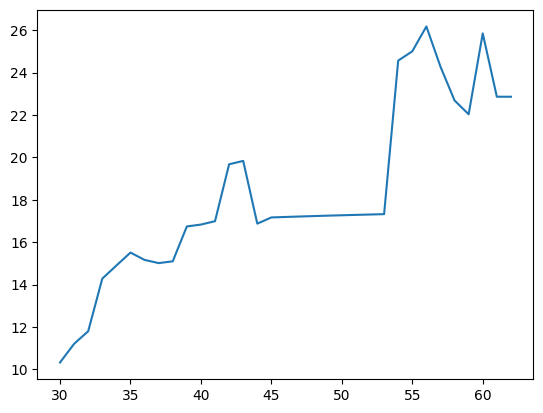

In [359]:
df_facts[(df_facts['series_id']=='GC.XPN.TOTL.GD.ZS')&(df_facts['country_id']=='ARG')]['value'].plot()

In [375]:
df_facts_30.to_csv('facts.csv',index=False)